In [1]:
# 20240228 갸아아아악 오늘 20번째 수업이라고??? 이거 진짜에요??? 진짜 거짓말 아니예요???

# 교통사고유형별 발생분석
<hr>
- 공공 데이터 교통사고 유형, 검색어 : 전국교통사고다발지역표준데이터
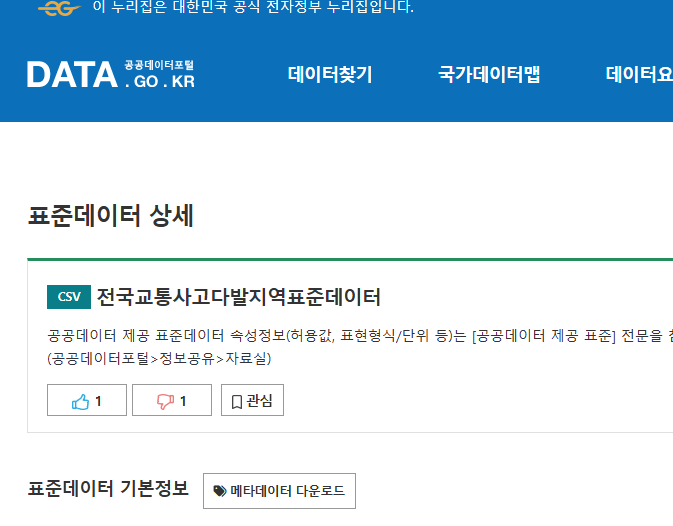
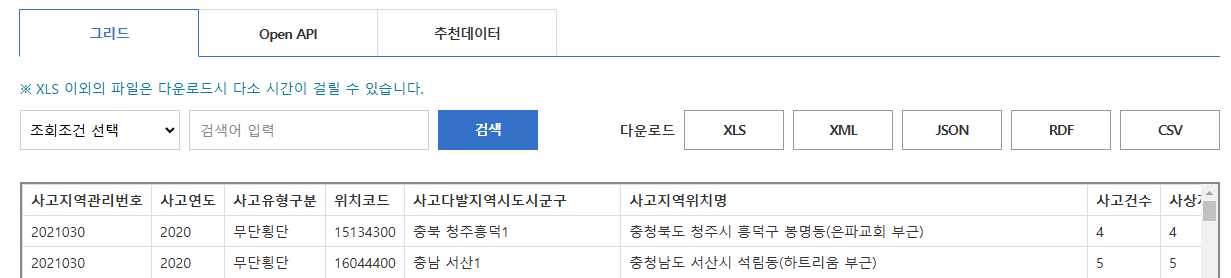

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd

#font 설정 D2coding
d2_path ="./data ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [3]:
file_path = "./data ref/전국교통사고다발지역표준데이터.csv"  # comma seperated values !!! 의 약자래!!!
ori = pd.read_csv(file_path, encoding="EUC-KR")
ori.head()

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고지역위치명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,제공기관코드,제공기관명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,4,0,2,2,0,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6...",2024-09-09,B555234,한국도로교통공단
1,2021030,2020,무단횡단,16044400,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,5,0,3,2,0,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7...",2024-09-09,B555234,한국도로교통공단
2,2021030,2020,무단횡단,16054400,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,6,1,1,4,0,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8...",2024-09-09,B555234,한국도로교통공단
3,2021030,2020,무단횡단,16054400,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,6,0,1,5,0,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8...",2024-09-09,B555234,한국도로교통공단
4,2021030,2020,무단횡단,16054400,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,5,0,3,2,0,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8...",2024-09-09,B555234,한국도로교통공단


In [4]:
ori_data = ori.copy()
ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name="count") # reset_index()를 붙여주면 다시 정리를 촤라락~ 해준다고!
# ori_data.columns = ['type', 'count'] ㅜㅜ 나는 됐는데~ 까비~
ori_data =ori_data.sort_values('count',ascending=False)  # 정리해준 후 자기 스스로에게 data를 덧씌워줘야함 !!
ori_data = ori_data.rename(columns={'사고유형구분':"type"}) # 한 개의 columns 이름 바꿔줄 때 !!
ori_data

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


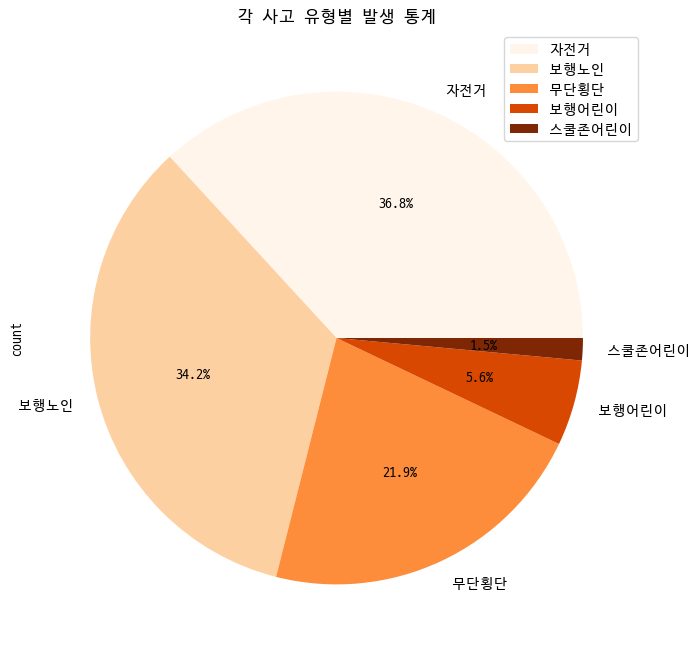

In [5]:
ori_data.plot(kind = 'pie', 
              y='count', 
              labels = ori_data['type'], 
              figsize= (8,8),  
              startangle = 0, 
              autopct= '%2.1f%%', 
              title = "각 사고 유형별 발생 통계", 
              cmap=matplotlib.cm.Oranges)  #cmap : 유형(색깔)을 담아놓은 탬플릿 !!
# plt.savefig('./data ref/accident.png')
plt.show()

In [6]:
ex_data = ori.copy()
ex_data = ex_data.rename(columns={'사고유형구분':'type','사고건수':'accidents','사고연도':'year'})
arr_data = list(set(ex_data['type']))

data_list = []
for t in arr_data:
    data_list.append(ex_data[ex_data['type']==t])
print(arr_data,data_list)

#단축
# data_list = [group for _, group in ex_data.groupby('type')]

['스쿨존어린이', '보행어린이', '보행노인', '자전거', '무단횡단'] [       사고지역관리번호  year    type      위치코드       사고다발지역시도시군구  \
320     2024041  2023  스쿨존어린이  51130001      강원특별자치도 원주시1   
321     2024041  2023  스쿨존어린이  52111001  전북특별자치도 전주시 완산구1   
322     2024041  2023  스쿨존어린이  52180001      전북특별자치도 정읍시1   
560     2013060  2012  스쿨존어린이  48310001         경상남도 거제시1   
561     2013060  2012  스쿨존어린이  48880001         경상남도 거창군1   
...         ...   ...     ...       ...               ...   
14278   2015042  2014  스쿨존어린이  48220001         경상남도 통영시1   
14279   2015042  2014  스쿨존어린이  48270001         경상남도 밀양시1   
14280   2015042  2014  스쿨존어린이  50110001      제주특별자치도 제주시1   
14281   2015042  2014  스쿨존어린이  50110002      제주특별자치도 제주시2   
14282   2015042  2014  스쿨존어린이  52130001      전북특별자치도 군산시1   

                                사고지역위치명  accidents  사상자수  사망자수  중상자수  경상자수  \
320            강원특별자치도 원주시 관설동(단관초교 부근)          2     2     0     1     1   
321    전북특별자치도 전주시 완산구 효자동2가(전주효천초교 부근)          2     2     0     

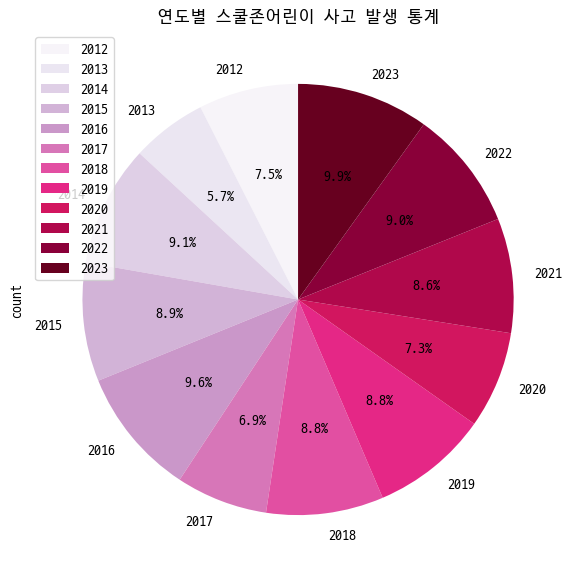

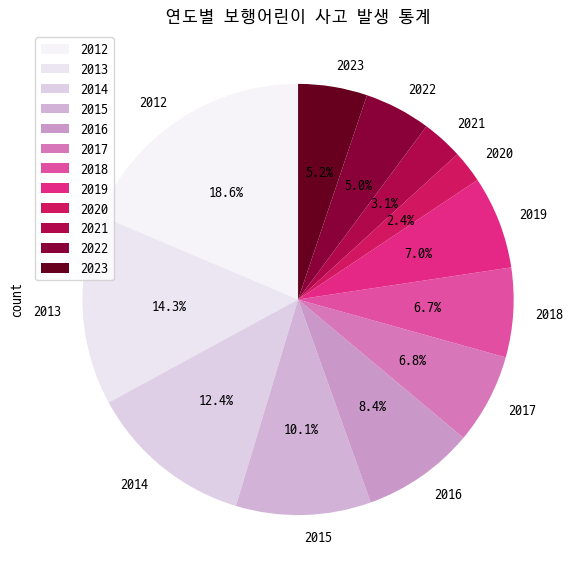

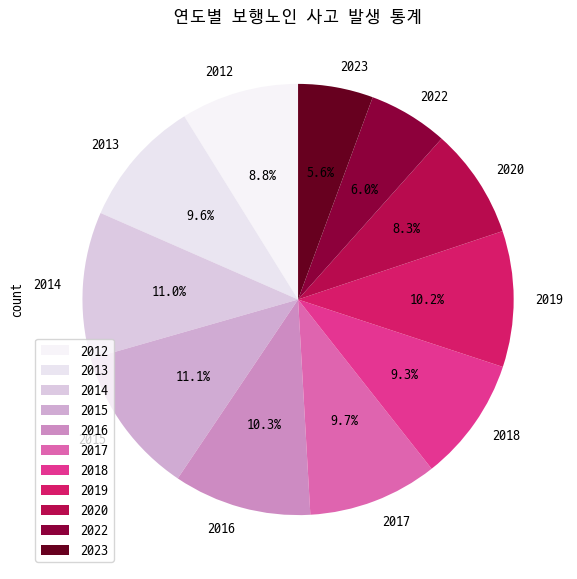

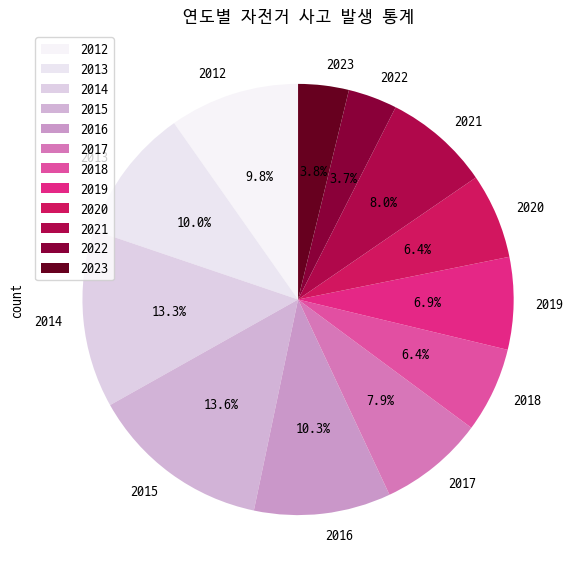

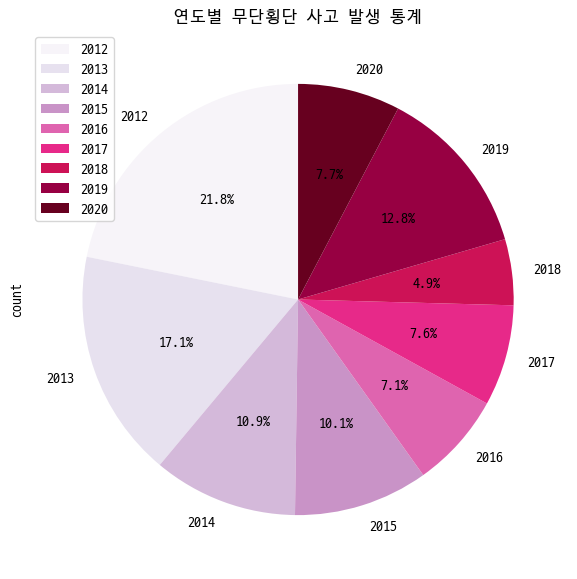

In [7]:
total_list = []
for d in data_list:
    result = d.groupby('year')["accidents"].sum().reset_index(name='count')
    total_list.append(result)

#print(arr_data,total_list)


# 모든 사고유형구분에 대한 그래프를 나타내고 싶을 때!
for i in range(len(arr_data)):
    total_list[i].plot( # 보기 힘들 때는 enter 쳐서 나열식으로 작성해보자 !
    kind = 'pie',
    y = 'count',
    labels = total_list[i]['year'],
    figsize = (7,7),
    startangle = 90,
    autopct = '%.1f%%',  # 이스케이프 문자로 %% : %를 표현해주기 위함 !
    title = f'연도별 {arr_data[i]} 사고 발생 통계',
    cmap = matplotlib.cm.PuRd)  # RdPu,Purples, Spectral, Pastel1/2, PuRd,BuPu,OrRd
    plt.savefig(f'./data ref/chart/{arr_data[i]}.png')
    plt.show()
    

In [8]:
# HTML 형식으로 차트와 표 여러 개를 한 번에 보여줄 수 있구나 ~~!
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex ;flex-wrap:wrap;width:1000px;">
    <div style="flex: 1; min-width:300px";>
        <div style="padding: 10px 0 10px 80px;">
        <h3>Data Table</h3>
        {ori_data.to_html(index=False)}
        </div>
    </div>"""
for v in range(len(arr_data)):
    html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
            <h3>Pie Chart{v+1}</h3>
            <img src="./data ref/chart/{arr_data[v]}.png" alt="Pie Chart">
        </div>"""
html+=f"""</div> """
    # HTML 표시
# print(html)
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


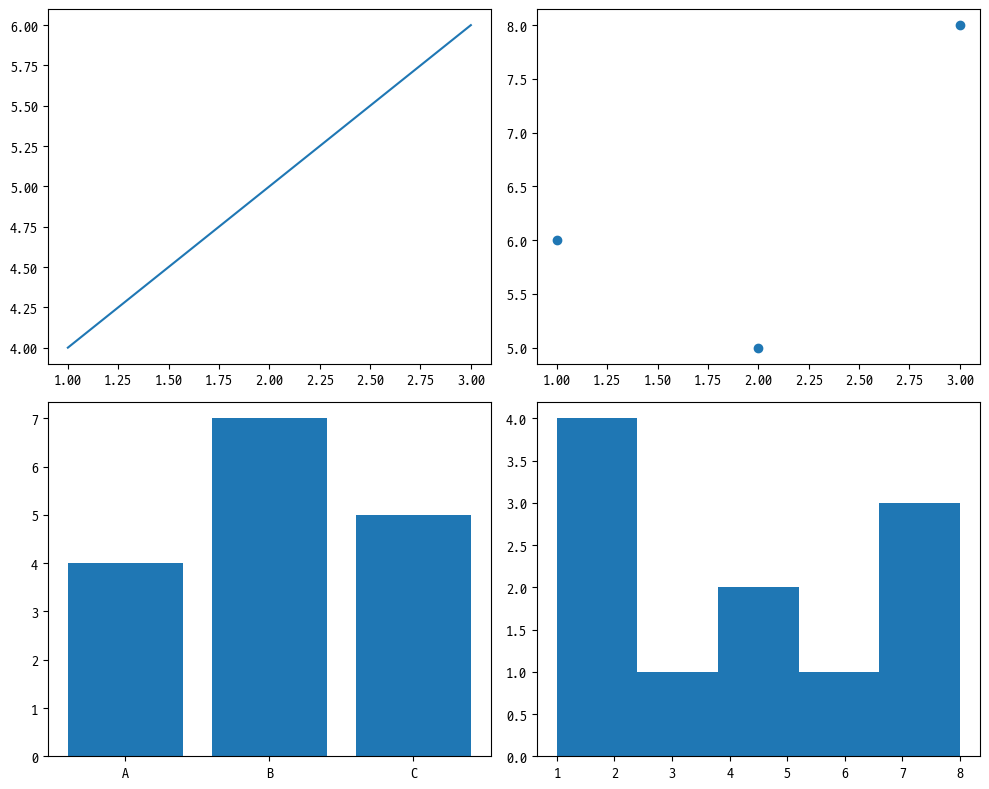

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(10,8))  # 2 x 2 서브 플롯 생성 : 4개가 생성된다는 뜻이다~
   # 행렬로 위치를 표현한다고 생각하면 된다 !! ex) axs[0,0]

axs[0,0].plot([1,2,3],[4,5,6])       # plot이란 linear(선형)한 그래프를 찍는것임!
axs[0,1].scatter([1,2,3],[6,5,8])    # scatter : 분산형 그래프(점)
axs[1,0].bar(['A','B','C'],[4,7,5])  # bar : 막대형 그래프~~!
axs[1,1].hist([1,2,3,4,1,2,6,7,4,7,8],bins=5)   # 히스토그램~! bins는 두께!!

plt.tight_layout()
plt.show()    # 그래프를 찍어보았어요~!

In [19]:
#!pip install folium
#!pip install ipython

In [13]:
map_data = ori.copy()